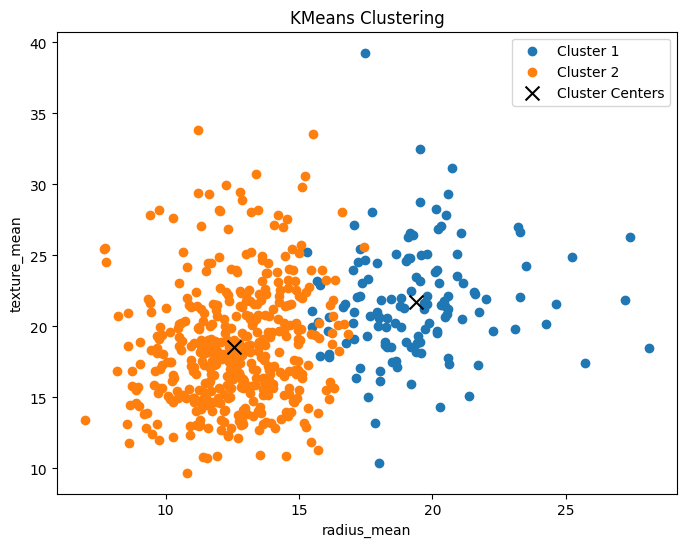

In [2]:
#ML Assingment_01 K-Mean clustering
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y)**2))

def kmeans(data, n_clusters, max_iterations=100):
    n_samples, n_features = data.shape

    # Take cluster centers randomly
    cluster_centers = data[np.random.choice(n_samples, size=n_clusters, replace=False)]

    for _ in range(max_iterations):
        # Assign each data point to the nearest cluster center based on Euclidean distance
        labels = np.argmin(np.array([[euclidean_distance(data[i], cluster_centers[j]) for j in range(n_clusters)] for i in range(n_samples)]), axis=1)

        # Update cluster centers
        new_cluster_centers = np.array([np.mean(data[labels == i], axis=0) for i in range(n_clusters)])

        # Check for convergence
        if np.all(new_cluster_centers == cluster_centers):
            break

        cluster_centers = new_cluster_centers

    return labels, cluster_centers

# Generate some random data points for demonstration
np.random.seed(0)
data = pd.read_csv('/content/cancer.csv')
attributes=data.drop(columns=['id','diagnosis','Unnamed: 32'])
data=attributes.values
# Number of clusters
n_clusters = 2

# Apply KMeans clustering
cluster_labels, cluster_centers = kmeans(data, n_clusters)

# Create a scatter plot to visualize the clusters
plt.figure(figsize=(8, 6))
for cluster_id in range(n_clusters):
    cluster_points = data[cluster_labels == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster_id + 1}")

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], color='black', s=100, marker='x', label='Cluster Centers')
plt.title("KMeans Clustering")
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()


In [ ]:
cluster_counts = np.bincount(cluster_labels)
print("Cluster counts:", cluster_counts)

Cluster counts: [131 438]
